In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data

maxlon = 230

KM = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/KM1314_vSept16.csv', sep = ',')
KM['density'] = sw.rho(KM['S'].values,KM['T'].values,0)

KM = KM[KM['Lon']<maxlon].dropna()

ST = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/STUD08_vSept16.csv', sep = ',')
ST['density'] = sw.rho(ST['S'].values,ST['T'].values,0)

ST = ST.dropna()


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


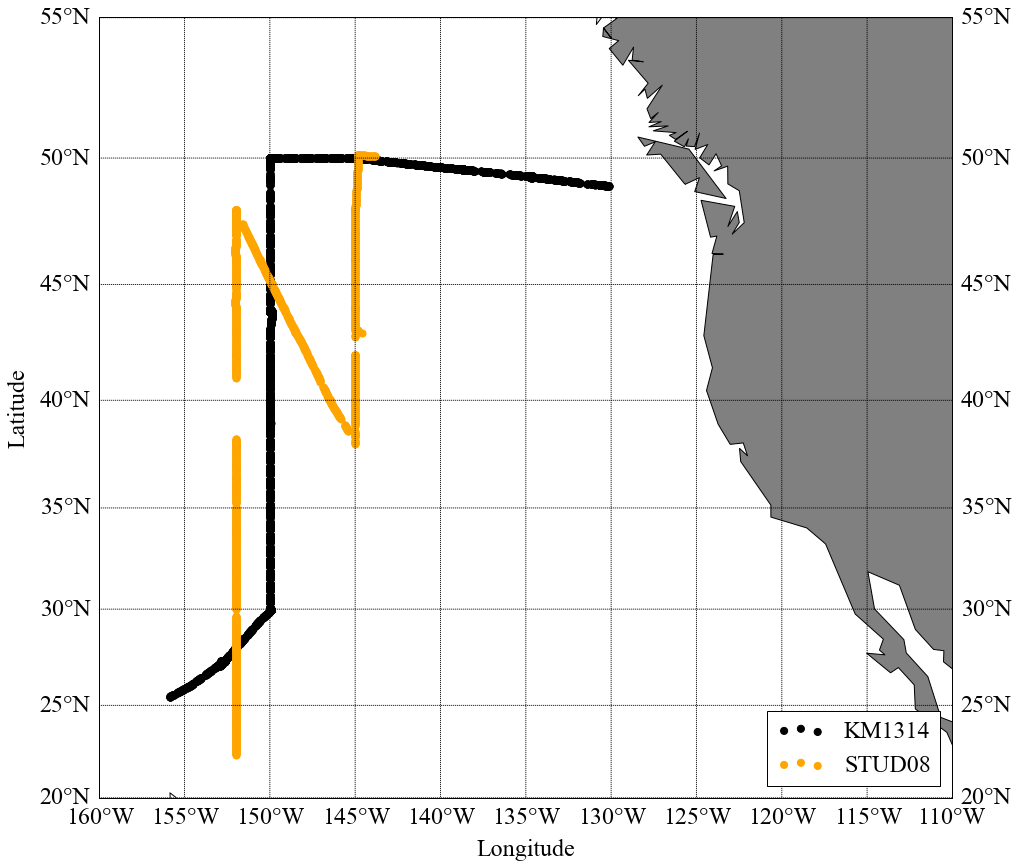

In [3]:
# make map showing where different cruises were

# plot the cruise track and EKE and Rossby radius contours
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


fig0 = plt.figure(1, figsize=(18,12), dpi = 600)

m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=55.01,\
            llcrnrlon=200,urcrnrlon=250,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')


palette = plt.get_cmap('YlGnBu_r', 15)
palette.set_bad('w',1.0)


xmT1, ymT1 = m(KM['Lon'].values, KM['Lat'].values)
xmT2, ymT2 = m(ST['Lon'].values, ST['Lat'].values)


m.scatter(xmT1, ymT1, s = 50, color='k', label = 'KM1314')

m.scatter(xmT2, ymT2, s = 50, color='orange', label = 'STUD08')
#CS4 = m.scatter(Xmc, Ymc, s = 2, color='k')

m.drawparallels(np.arange(-50,80,5),labels=[1,1,0,1], fontsize=24)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 40)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)

plt.legend(loc = 'lower right', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)

plt.tick_params(labelsize=24)
plt.show()

#fig0.savefig('../figures/NCP_Map_dates.png', bbox_inches='tight', dpi=600)

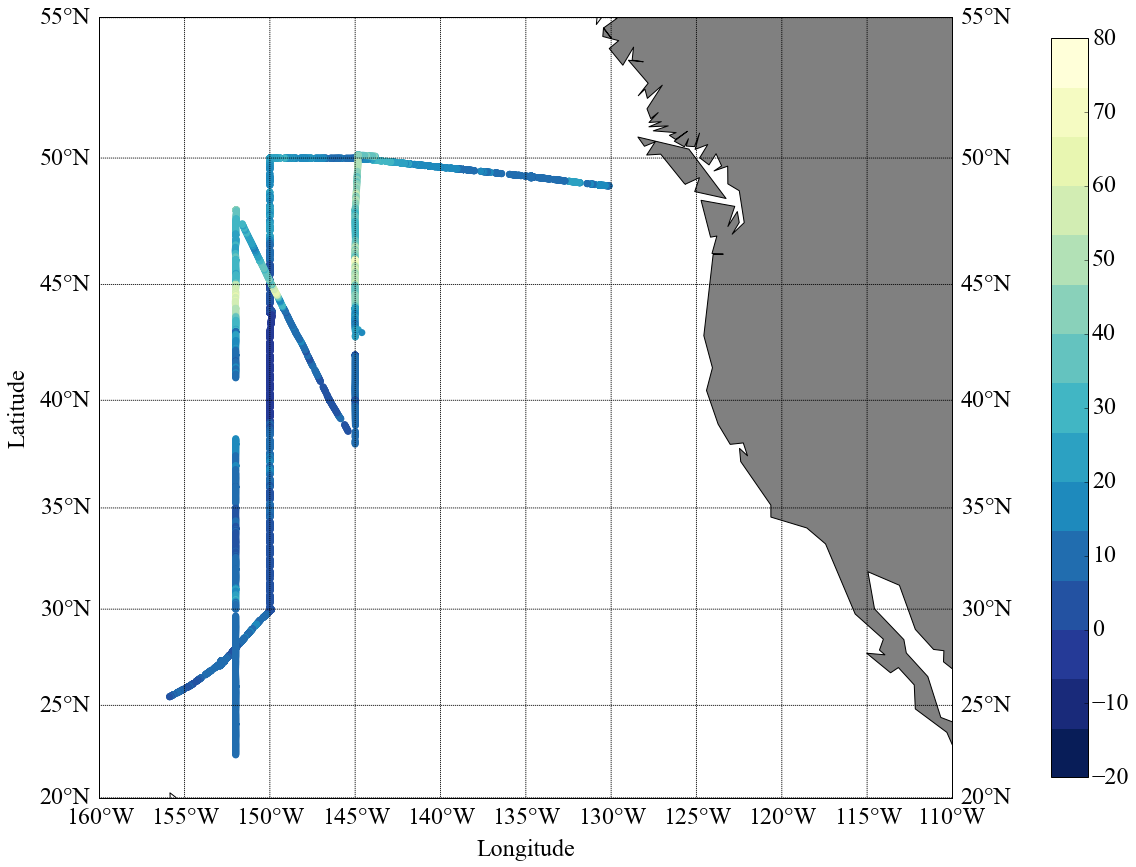

In [4]:
# make map showing where different cruises were
# make map showing where different cruises were

# plot the cruise track and EKE and Rossby radius contours
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


fig0 = plt.figure(1, figsize=(18,12), dpi = 600)

m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=55.01,\
            llcrnrlon=200,urcrnrlon=250,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')


palette = plt.get_cmap('YlGnBu_r', 15)
palette.set_bad('w',1.0)


xmT1, ymT1 = m(KM['Lon'].values, KM['Lat'].values)
xmT2, ymT2 = m(ST['Lon'].values, ST['Lat'].values)


m.scatter(xmT1, ymT1, c = KM['Air-sea flux'].values, s = 50, vmin=-20, vmax = 80,cmap = palette, lw=0, label = 'KM1314')

m.scatter(xmT2, ymT2, c = ST['Air-sea flux'].values, s = 50, vmin=-20, vmax = 80,cmap = palette, lw=0, label  = 'STUD08')
#CS4 = m.scatter(Xmc, Ymc, s = 2, color='k')

m.drawparallels(np.arange(-50,80,5),labels=[1,1,0,1], fontsize=24)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 40)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)


cb = plt.colorbar(pad = 0.08, fraction =0.03)
cb.ax.tick_params(labelsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)

plt.tick_params(labelsize=24)
plt.show()

#fig1.savefig('../figures/NCP_Map.png', bbox_inches='tight', dpi=600)

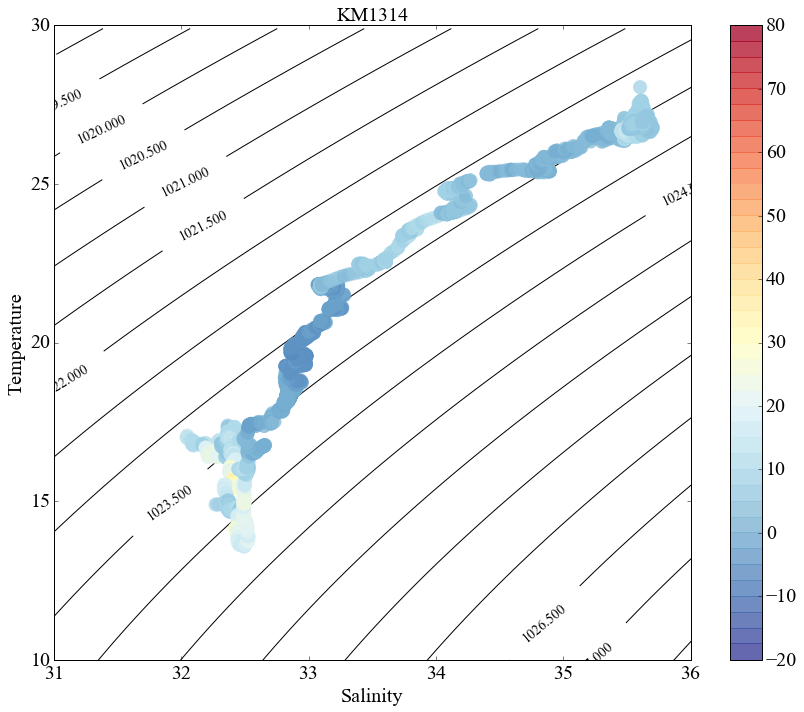

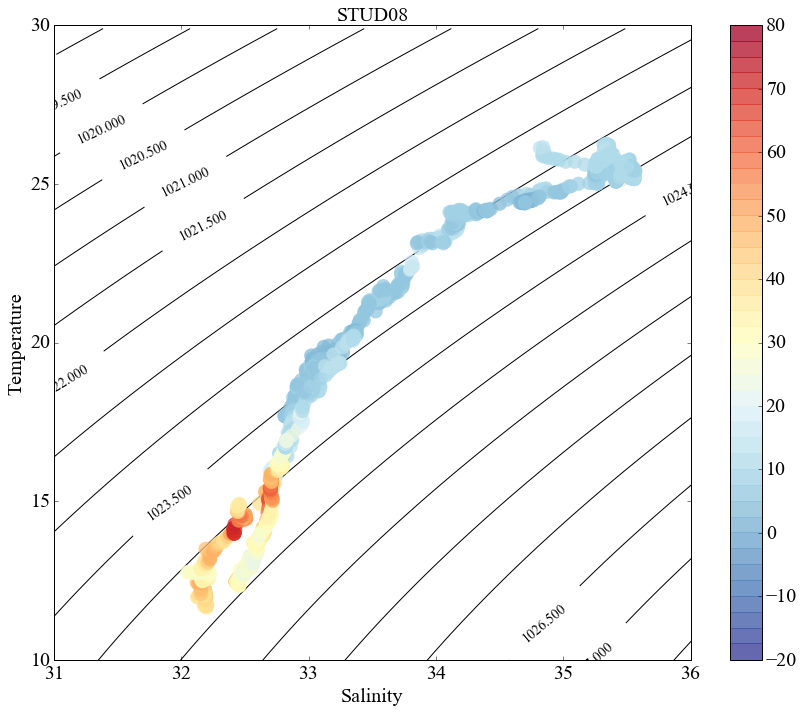

In [10]:
# make T/S plots

ss = np.arange(30, 37, 0.01)
tt = np.arange(0, 30, 0.1)

s, t = np.meshgrid(ss,tt, indexing='ij')
den = sw.rho(s,t,0)

#### Tokyo1 - May 2011
fig2 = plt.figure(2, figsize = (12, 10), dpi = 600)

palette = plt.get_cmap('RdYlBu_r', 40)

CS = plt.contour(s, t, den, 25, colors= 'k', zorder = 0)
plt.clabel(CS, inline=1, fontsize=14)
plt.scatter(KM['S'],KM['T'], s = 200, lw = 0, c = KM['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =1)

plt.axis([31, 36, 10, 30])
plt.xlabel('Salinity', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)

plt.title('KM1314', fontsize=20)
plt.show()

#fig2.savefig('../figures/NCP_May11.png', bbox_inches='tight', dpi=600)

#### Tokyo3 - September 2011
fig3 = plt.figure(1, figsize = (12, 10), dpi = 600)


palette = plt.get_cmap('RdYlBu_r', 40)

CS = plt.contour(s, t, den, 25, colors= 'k', zorder = 0)
plt.clabel(CS, inline=1, fontsize=14)
plt.scatter(ST['S'],ST['T'], s = 200, lw = 0, c = ST['Air-sea flux'], alpha = 0.75, vmin=-20, vmax =80, cmap = palette, zorder =1)

plt.axis([31, 36,10, 30])
plt.xlabel('Salinity', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('STUD08', fontsize=20)
plt.show()

#fig3.savefig('../figures/NCP_July12.png', bbox_inches='tight', dpi=600)



In [8]:
#print Tok3[(Tok3['Lon']>155) & (Tok3['Lon']<160)]

from datetime import datetime, timedelta

matlab_datenum = 734771.2052
python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

print python_datetime


2011-09-25 04:55:29.279997
